In [21]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np; np.random.seed(22)
import seaborn as sns; sns.set(color_codes=True)

In [22]:
df = pd.read_csv('data/train-file.csv')

In [23]:
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


## No Null values so no need for manipulating nan
Quite surprised to see this tbh, but easier for me!

In [24]:
df.isnull().any()

DateTime    False
Junction    False
Vehicles    False
ID          False
dtype: bool

### Split DateTime as Date and Time in seperate columns for easier manipulation

In [25]:
dt = []
tm = []
for x in df.DateTime:
    dt.append(x.split(" ")[0])
    tm.append(x.split(" ")[1])
    
df['dt'] = dt
df['tm']= tm

In [26]:
df.head()

,DateTime,Junction,Vehicles,ID,dt,tm
0,2015-11-01 00:00:00,1,15,20151101001,2015-11-01,00:00:00
1,2015-11-01 01:00:00,1,13,20151101011,2015-11-01,01:00:00
2,2015-11-01 02:00:00,1,10,20151101021,2015-11-01,02:00:00
3,2015-11-01 03:00:00,1,7,20151101031,2015-11-01,03:00:00
4,2015-11-01 04:00:00,1,9,20151101041,2015-11-01,04:00:00


In [27]:
for x in df.tm.unique():
    df.loc[df.tm == x, 'tm'] = x[0:2]

In [28]:
df.head()

,DateTime,Junction,Vehicles,ID,dt,tm
0,2015-11-01 00:00:00,1,15,20151101001,2015-11-01,00
1,2015-11-01 01:00:00,1,13,20151101011,2015-11-01,01
2,2015-11-01 02:00:00,1,10,20151101021,2015-11-01,02
3,2015-11-01 03:00:00,1,7,20151101031,2015-11-01,03
4,2015-11-01 04:00:00,1,9,20151101041,2015-11-01,04


### Dropped DateTime

DateTime column split hence
we don't need the combined column anymore.

In [29]:
# df = df.drop('DateTime', axis=1)

In [30]:
df.isnull().any()

DateTime    False
Junction    False
Vehicles    False
ID          False
dt          False
tm          False
dtype: bool

In [31]:
df.head()

,DateTime,Junction,Vehicles,ID,dt,tm
0,2015-11-01 00:00:00,1,15,20151101001,2015-11-01,00
1,2015-11-01 01:00:00,1,13,20151101011,2015-11-01,01
2,2015-11-01 02:00:00,1,10,20151101021,2015-11-01,02
3,2015-11-01 03:00:00,1,7,20151101031,2015-11-01,03
4,2015-11-01 04:00:00,1,9,20151101041,2015-11-01,04


In [32]:
for x in df.dt.unique():
#     print(x)
#     print(x[8:])
    df.loc[df.dt == x, 'dd'] = x[8:]

for x in df.dt.unique():
#     print(x)
#     print(x[5:7])
    df.loc[df.dt == x, 'mm'] = x[5:7]

for x in df.dt.unique():
#     print(x)
#     print(x[0:4])
    df.loc[df.dt == x, 'yy'] = x[0:4]

In [33]:
df.head()

,DateTime,Junction,Vehicles,ID,dt,tm,dd,mm,yy
0,2015-11-01 00:00:00,1,15,20151101001,2015-11-01,00,01,11,2015
1,2015-11-01 01:00:00,1,13,20151101011,2015-11-01,01,01,11,2015
2,2015-11-01 02:00:00,1,10,20151101021,2015-11-01,02,01,11,2015
3,2015-11-01 03:00:00,1,7,20151101031,2015-11-01,03,01,11,2015
4,2015-11-01 04:00:00,1,9,20151101041,2015-11-01,04,01,11,2015


In [34]:
import datetime

for x in df.index:
    today = datetime.datetime(int(df.dt[x].split('-')[0]), int(df.dt[x].split('-')[1]), int(df.dt[x].split('-')[2]))
    weekno = today.weekday()
    if weekno<5:
        df.loc[df.index==x,"weekend"] = 0
    else:
        df.loc[df.index==x,"weekend"] = 1

In [35]:
df.head()

,DateTime,Junction,Vehicles,ID,dt,tm,dd,mm,yy,weekend
0,2015-11-01 00:00:00,1,15,20151101001,2015-11-01,00,01,11,2015,1.0
1,2015-11-01 01:00:00,1,13,20151101011,2015-11-01,01,01,11,2015,1.0
2,2015-11-01 02:00:00,1,10,20151101021,2015-11-01,02,01,11,2015,1.0
3,2015-11-01 03:00:00,1,7,20151101031,2015-11-01,03,01,11,2015,1.0
4,2015-11-01 04:00:00,1,9,20151101041,2015-11-01,04,01,11,2015,1.0


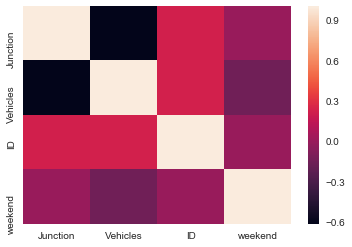

In [36]:
cor = df.corr()
sns.heatmap(cor)

In [37]:
df.to_csv('data/processed.csv', index=False)

In [61]:
df = pd.read_csv('data/processed.csv', header=0, index_col=0)

In [62]:
df.head()

,Junction,Vehicles,ID,dt,tm,dd,mm,yy,weekend
DateTime,,,,,,,,,
2015-11-01 00:00:00,1,15,20151101001,2015-11-01,0,1,11,2015,1.0
2015-11-01 01:00:00,1,13,20151101011,2015-11-01,1,1,11,2015,1.0
2015-11-01 02:00:00,1,10,20151101021,2015-11-01,2,1,11,2015,1.0
2015-11-01 03:00:00,1,7,20151101031,2015-11-01,3,1,11,2015,1.0
2015-11-01 04:00:00,1,9,20151101041,2015-11-01,4,1,11,2015,1.0


In [63]:
df = df.drop('dt',axis=1)
df = df.drop('tm',axis=1)
df = df.drop('dd',axis=1)
df = df.drop('mm',axis=1)
df = df.drop('yy',axis=1)

In [64]:
df.head()

,Junction,Vehicles,ID,weekend
DateTime,,,,
2015-11-01 00:00:00,1,15,20151101001,1.0
2015-11-01 01:00:00,1,13,20151101011,1.0
2015-11-01 02:00:00,1,10,20151101021,1.0
2015-11-01 03:00:00,1,7,20151101031,1.0
2015-11-01 04:00:00,1,9,20151101041,1.0


In [65]:
values = df.values
groups = [0,1,3]

In [66]:
i = 1

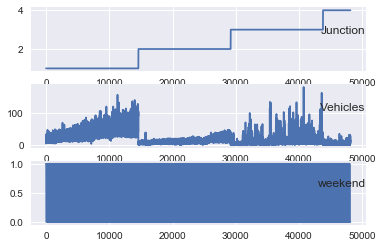

In [67]:
plt.figure()
for group in groups:
    plt.subplot(len(groups),1,i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [69]:
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.
/Users/arjun921/anaconda3/envs/idp3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [70]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = df
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

IndexError: index 4 is out of bounds for axis 1 with size 4

In [705]:
x = df.drop('Vehicles', axis=1)
x = x.drop('dt', axis=1)
y = df.Vehicles.to_frame()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [706]:
x_train.head()

,Junction,ID,tm,dd,mm,yy,weekend
30256,3,20151215163,16,15,12,2015,0.0
30018,3,20151205183,18,5,12,2015,1.0
33134,3,20160413143,14,13,4,2016,0.0
38627,3,20161128113,11,28,11,2016,0.0
16658,2,20160126022,2,26,1,2016,0.0


# Random Forest performs like shit.

In [734]:
from sklearn.ensemble import RandomForestClassifier
X = x_train
Y = y_train

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)

/Users/arjun921/anaconda3/envs/idp3/lib/python3.6/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [735]:
y_pred = clf.predict(x_test)

In [736]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

27.752493765586035

In [716]:
mean_absolute_percentage_error(y_test, y_pred)

151.84736513686039

# Linear Regression


In [524]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()

In [533]:
df = df.a

numpy.ndarray

# Actual Testing

In [737]:
tes = pd.read_csv("data/processed_test.csv")
tes = tes.drop('DateTime', axis=1)
tes = tes.drop('dt', axis=1)

In [738]:
tes.head()

,Junction,ID,tm,dd,mm,yy,weekend
0,1,20170701001,0,1,7,2017,1.0
1,1,20170701011,1,1,7,2017,1.0
2,1,20170701021,2,1,7,2017,1.0
3,1,20170701031,3,1,7,2017,1.0
4,1,20170701041,4,1,7,2017,1.0


In [739]:
y_pred = clf.predict(tes)

In [741]:
tes['Vehicles'] = y_pred

In [749]:
out = tes[['ID','Vehicles']]

In [750]:
out.to_csv('RF_Submission_20171119021.csv',index=False)